# Conduccion de calor en 1D estacionaria
## Geofisica matematica y Computacional 
## Hector Perez Hernandez 
## Fecha: 1 Octubre 2021

## Modelo Conceptual 
Estudiaremos la transferencia de calor, existen diversas maneras de transferir el calor; conveccion, radiacion y conduccion. Cada una de ellas transfiere e calor de maneras muy particulares. 

##### Conveccion
    Es el modo en el cual un fluido y una superficie entran en movimiento       devido a que tienen diferentes temperaturas, un ejempo muy famoso es el de la olla llena de agua, la cual genera un movimiento en su interior a manera de remolinos, el contacto entre la superficie del metal caliente y el fluido (Agua) genera este fenomeno de conveccion. Haciendo esta referencia de manera macroscopica, es el mismo concepto que genera el movimiento de las pacas tectonicas. El fluido es el magma de la astenosfera, el cual al estar en contacto con la litosfera (La delgada corteza terrestre) genera un movimiento el cual hace que la corteza se desplaze y este fenomeno es el que le da vida a la mayoria de los sismos y el que genera e movimiento continental. 
##### Radiacion
    Un fenomeno muy conocido de manera empirica, ya que lo hemos experimentado al tratar de tocar una flama lo cual suele estar impulsado por la curiosidad. El sentir que nos quemamos incuso antes de tocarla es transferencia de calor por radiacion, este calor se transfiere gracias a las ondas electromagneticas las cuales no necesitan del contacto directo para transferir la energia de un cuerpo al otro. 
#### Conduccion
    Es tal vez el primer fenomeno que se nos viene a la mente al momento de pensar en transferencia de calor, ya que suele ser el mas comun o al menos el mas intuitivo. Es la manera en la cual se transfiere el calor de un cuerpo al otro mediante e contacto entre los mismos, esto es se puede apreciar con los pinguinos, todos amontonados los unos con los otros con el fin de mantenerse calientitos; se transfieren calor mediante conduccion. Esto en palabras mas precisas es el gradiente de temperatura en un medio estacionario, el cual es el objetivo de estudio de este trabajo. 
   #### Ley de Fourier
La manera de cuantificar la transferencia de calor mediante ecuaciones de cambio las cuales calculan a cantidad de energia transferida en un cierto tiempo puede ser la ley de Fourier a cual esta dada por:
       
$$ q^"_{ x}=-k\frac{d T}{d x} $$
Donde 
$$ q^"_{ x} (W/m^2) $$
representa la veocidad de tansferencia de calor en la direccion x por unidad de area perpendicular a la direccion de transferencia, tambien conocida como flujo de calor o transferencia de calor por unidad de area. 
$$ k (W/m.K) $$
Es la propiedad del material que representa a la conductividad termica
   #### Gradiente de temperatura
El gradiente es la variacion de una magnitud en funcion de una distancia, en este caso la magnitud es la temperatura y esta en funcion de la distancia del medio en e cual se propaga la energia. 
$$ q^"_{ x}=-k\frac{T_2-T_1}{L}=k\frac{\Delta{T}}{L} $$
Donde 
$$ q_{x} (W) $$
representa a transferencia de calor por conduccion.

#### Hipotesis
En este codigo lo que se busca es observar el comportamiento de la ecuacion de calor simple para el probema de transferencia de calor, mediante la variacion de k la conductividad termica, L la cual es la longitud ya que debemos recordar que este probema no depende de tiempo si no de la distancia. Para este caso las paredes seran adiabaticas lo que significa que tenemos una frontera cerrada. 
        
## Modelo matematico
Conduccion
Ya que estamos haciendo uso de la ecuacion de transferencia de calor simple, se eliminaron varios parametros de la ecuaion general de transferencia de calor, obteniendo:  

$$ -k \frac{d^2 T}{d x^2} = S $$

Donde los parametros de temperatura son:

$$ T(x=0)= T_A $$

$$ T(x=L)= T_B $$

Recordando que esta en funcion de la distancia por ello la temperatura A es inicializada en 0 ya que aun no ha habido desplazamiento y a temperatura B se encuentra en funcion de la longitud de cuerpo ya que esa es a distancia que se ha recorrido.


$$ S [J/m^3 s]$$
Es la ganancia o perdida de calor

## Modelo Numerico

Ya que estamos utilizando la programacion para observar el comportamiento de fenomeno de transferencia de calor por conduccion, lo que debemos hacer es discretizar el dominio. Debemos de partir el dominio en celdas, lo que nos generara una malla, la cual servira como seccinar el problema en pequeños problemas para irlos resolviendo uno a uno. Generaremos nodos los cuales seran las uniones de las celdas, estos son los enlaces y es donde se realizaran los calculos. 

#### Nodos (i)
    La numeracion de nodos comienza en 0 y la finaizacion sera siempre N+1 asi que si tenemos 4 Nodos o cuatro uniones al inicia en 0 esta sera la primer frontera, es decir la pared de nuestra "cajita" y N+1 sera la pared final, con ello lograremos construir el dominio. 
    
#### Ecuaciones discretas
$$ \frac{d^2 T}{d x^2} |_i $$

Evaluando la ecuacion en cada nodo (i) para poder resover las celldas y con esto ir construyendo nuestra solucion discreta. 

$$ \frac{d^2 T}{d x^2} |_i = \frac{T_i+1 - 2T_i + T_i-1}{h^2}  + O(h^2)$$

Donde $$ T_i+1  $$ significa un paso adelante, es decir el nodo siguiente
Donde $$ T_i-1  $$ significa un paso detras, es decir el nodo anterior 
Donde $$ T_i  $$ significa e nodo actual
Sustituyendo en la ecuacion original tenemos:

$$ -k_i \frac{T_i+1 - 2T_i + T_i-1}{h^2} = S_i $$

Utilizando un parametro  r como:
$$ r_i = \frac{k_i}{h^2} $$
Podemos realizar 
$$ -r_i T_i-1 + 2r_i T_i -r_i T_i+1 = S_i $$
Si suponemos tener solo 4 nodos las fronteras quedarian del siguiente modo.
Para T A la temperatura inicial

$$ 2r_1 T_1 - r_1 T_2 = S_1 + r_1 T_A $$

Para T B la temperatura finnal

$$ -r_4 T_3 + 2r_4 T_4 = S_4 + r_4 T_B $$
 Las cuales son nuestras condiciones de frontera. 
 

## Modelo Computacional

Teniendo en cuenta lo anterior, tenemos:


In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
#Parametros para el estilo de graficas
plt.style.use('seaborn-paper')
params = {'figure.figsize'  :(14,7),
          #'text.usetex'     :True,
          'xtick.labelsize' :20,
          'ytick.labelsize' :20,
          'axes.labelsize'  :24,
          'axes.titlesize'  :24,
          'legend.fontsize' :24,
          'lines.markersize':10,
          'grid.color'      : 'darkgray',
          'grid.linewidth'  : 0.5,
          'grid.linestyle'  : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
def buildMatrix(N):
        # Matriz de ceros
##En esta funcion lo que se hace es generar una matriz de N x N
##esto significa que tendra el tamaño del numero de nodos (N) que elegimos

        A = np.zeros((N,N))
        
        #Primer renglon
        A [0,0] = 2
        A [0,1] = -1
        
        #Renglones interiores
        for i in range (1,N-1):
                A[i,i] = 2
                A[i,i+1] = -1
                A[i,i-1] = -1
        #Utimo renglon 
        A[N-1,N-2] = -1
        A[N-1,N-1] = 2

        return A

In [40]:
#Parametros Fisicos
"""
En los parametros fisicos elegimos que a ongitud de nuestro material fuera de 1 es decir S = 1.
y la conductividad termica fuera constante, se eliguieron 4 nodos N = 4 y h es la division de mi parametro.
"""
L = 1.0
TA = 1
TB = 0
k = 1.0
S = 0.0
#Parametros numericos 
N = 4
h = L / (N+1)
r = k / h**2

A= [[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]

T= [1.  0.8 0.6 0.4 0.2 0. ]


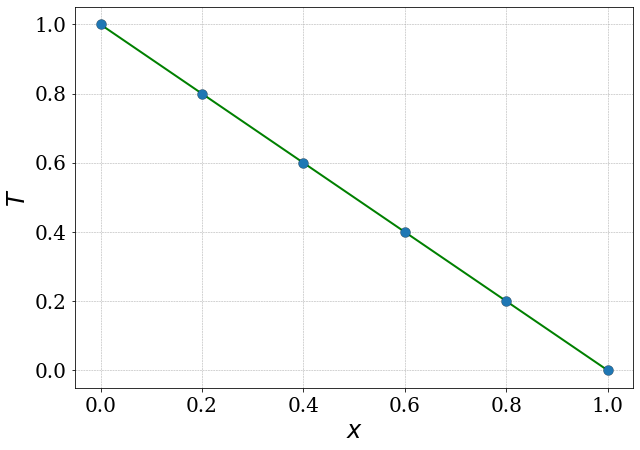

En la grafica se observa la caida de temperatura conforme se va alejando del inicio
es lo que naturalmente sucede pero se debe tomar en cuenta
que  S=0 esto es la ganancia o perdida de calor


In [41]:
#Arrego para almacenar la solucion 
T = np.zeros(N + 2)
T[0]  = TA #Fronteras izquierda
T[-1] = TB #Frontera derecha 

#Lado derecho del sistema 
b = np.zeros(N) 
b[ : ] = S / r   # Fuente de sumidero 
b[0]  += T[0]    # Condiciones de frontera 
b[-1] += T[-1]   #Condiciones de frontera

#Construccion de la matriz 
A = buildMatrix(N)

#Solucion del sistema lineal 
T[1:N+1] = np.linalg.solve(A,b)

#impresion y graficacion de la soulcion 
print('A=',A)
print('\nT=',T)
x = np.linspace(0, L, N+2)
plt.figure(figsize=(10,7))
plt.plot(x, T, c='green',lw = 2.0)
plt.scatter(x, T, edgecolor='k', zorder=10)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.grid()
plt.show()
#plt.savefig('Grafica_1.pdf')
plt.show()
print('En la grafica se observa la caida de temperatura conforme se va alejando del inicio\nes lo que naturalmente sucede pero se debe tomar en cuenta\nque  S=0 esto es la ganancia o perdida de calor')

In [42]:
def solExact(x, TA, TB, k, L, S):
    """
    Calculo de la solucion exacta.
    """
    return ((TB-TA)/L+(S/(2*k))*(L-x))*x+TA

In [43]:
def solNum(L, N, k, S, A, b, T, etiqueta):
    h = L / (N+1)
    r = k /  h**2
    
    # Lado derecho del sistema
    b = np.zeros(N)
    b[:] = S / r # Fuente o sumidero
    b[0] += T[0] # Condicion de frontera
    b[-1] += T[-1] # Condicion de frontera
    
    #Solucion del sistema lineal
    T[1:N+1] = np.linalg.solve(A,b)
    
    # Impresiones y graficas de la soucion 
    x = np.linspace(0, L, N+2)
    
    # Construccion de la etiqueta de cada grafica 
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$\kappa$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta = '$S$ = {:3.2f}'.format(S)
    
    # Se grafican los puntos de la solucion 
    plt.scatter(x, T, edgecolor='k' , s=50, zorder=10, label=etiqueta)
    
def plotSol(title, filename):
    plt.suptitle('Conduccion estacionaria', fontsize = 20, y = 0.94, va = 'center_baseline')
    plt.title(title, fontsize = 20, color = 'blue')
    plt.ylabel('$T$')
    plt.xlabel('$x$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.grid()
    plt.savefig(filename)
    plt.show() 

In [44]:
# Parametros fisicos
l = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

# Parametros numericos 
N = 10

# Arreglo para almacenar la soucion
T = np.zeros(N+2)
T[0]  = TA # Frontera Izquierda
T[-1] = TB # Frontera derecha

#Construccion de la matriz
A = buildMatrix(N)

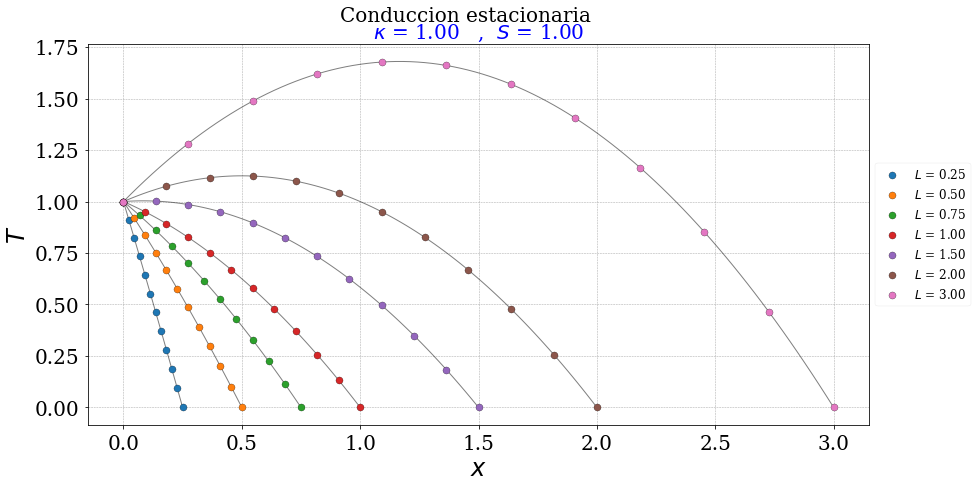

En la grafica se observa e comportamiento real ya que S es diferente de cero, esto indica una mayor temperatura en el centro de a estructura
tambien en este caso la conductividad termica es constante
 pero longitud varia en diferentes casos


In [45]:
for L in l:
    solNum(L, N, k, S, A, b, T, 'L')
    xe = np.linspace(0,L,100)
    plt.plot(xe, solExact(xe, TA, TB, k, L, S), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$\kappa$ = {:3.2f}   ,'.format(k) + '  $S$ = {:3.2f}'.format(S), 'L_variable.pdf' )
print('En la grafica se observa e comportamiento real ya que S es diferente de cero, esto indica una mayor temperatura en el centro de a estructura\ntambien en este caso la conductividad termica es constante\n pero longitud varia en diferentes casos')

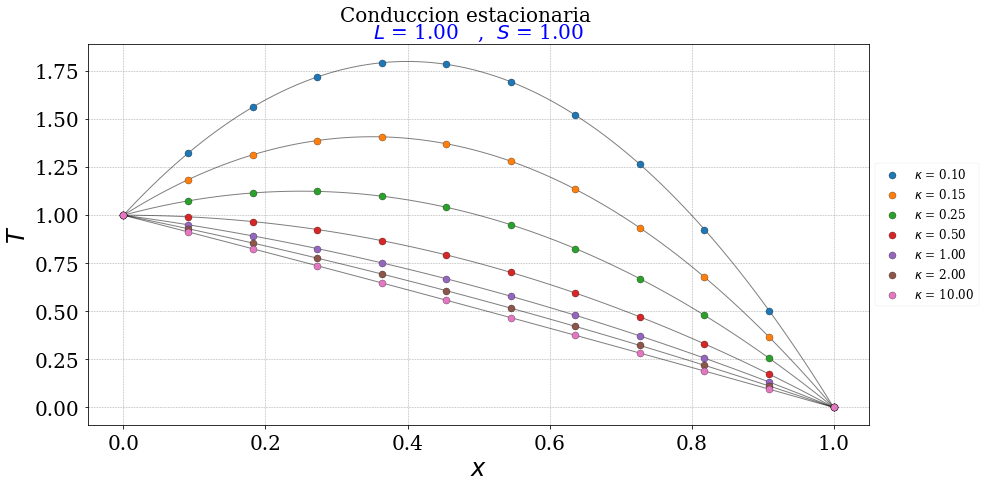

En la grafica se observa que a conductividad termica varia, pero la longitud y a perdida de calor es constante
esto demuestra las diferentes propiedades de los materiales sirven para diferentes propositos
ya sea de perdida rapida de calor o de conservacion de mismo


In [46]:
# Parametros fisicos
l = [0.1,0.15,0.25,0.5,1.0,2.0,10]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

# Parametros numericos 
N = 10

# Arreglo para almacenar la soucion
T = np.zeros(N+2)
T[0]  = TA # Frontera Izquierda
T[-1] = TB # Frontera derecha

#Construccion de la matriz
A = buildMatrix(N)


for L in l:
    solNum(k, N, L, S, A, b, T, 'k')
    xe = np.linspace(0,k,100)
    plt.plot(xe, solExact(xe, TA, TB, L, k, S), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$L$ = {:3.2f}   ,'.format(k) + '  $S$ = {:3.2f}'.format(S), 'L_variable.pdf' )
print('En la grafica se observa que a conductividad termica varia, pero la longitud y a perdida de calor es constante\nesto demuestra las diferentes propiedades de los materiales sirven para diferentes propositos\nya sea de perdida rapida de calor o de conservacion de mismo')

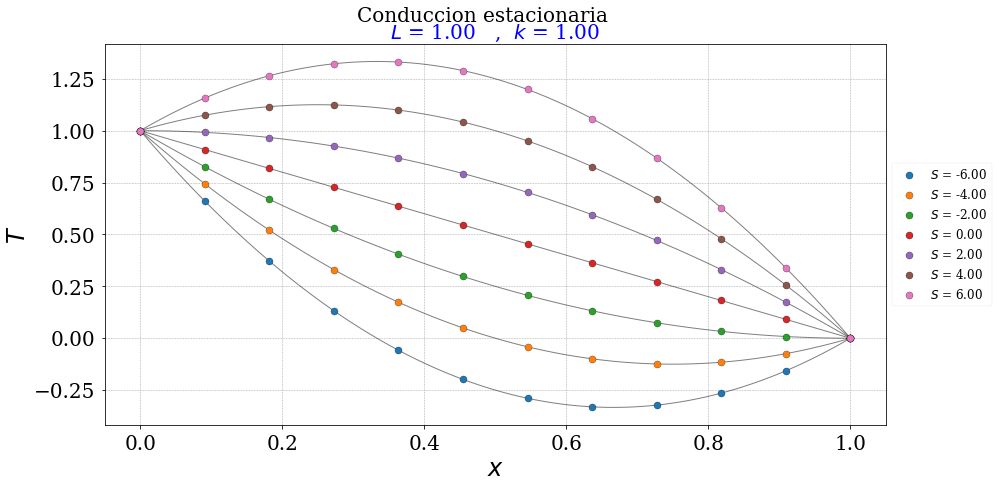

En la grafica se observa el comportamiento si variamos la perdida de calor, en un materia de la misma longitud y misma conductividad termica


In [47]:
# Parametros fisicos
l = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

# Parametros numericos 
N = 10

# Arreglo para almacenar la soucion
T = np.zeros(N+2)
T[0]  = TA # Frontera Izquierda
T[-1] = TB # Frontera derecha

#Construccion de la matriz
A = buildMatrix(N)

for L in l:
    solNum(S, N, k, L, A, b, T, 'S')
    xe = np.linspace(0,S,100)
    plt.plot(xe, solExact(xe, TA, TB, k, S, L), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$L$ = {:3.2f}   ,'.format(k) + '  $k$ = {:3.2f}'.format(S), 'L_variable.pdf' )
print('En la grafica se observa el comportamiento si variamos la perdida de calor, en un materia de la misma longitud y misma conductividad termica')